# Exercício 1 — Iris
Notebook **simplificado**, pensado para ensino inicial. Cada etapa é curta e explicada.

**O que vamos fazer:**
1. Carregar o dataset Iris (features e rótulos).
2. Visualizar rapidamente os dados.
3. Dividir em **treino (70%)**, **validação (15%)** e **teste (15%)**.
4. Treinar um modelo simples (Regressão Logística).
5. Avaliar no **validação** (ajustes) e no **teste** (resultado final).
6. Entender a matriz de confusão e as métricas (acurácia, precisão, recall, F1).

## 1) Imports essenciais

In [1]:
# Bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Scikit-learn (dados, divisão e métricas)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Garantir reprodutibilidade ( mesmo split de dados todas as vezes que rodarmos o notebook)
# Caso seja aleatorio, o resultado vai ser diferente em cada execução
# 42 é a reposta para a questão fundamental da vida, do universo, e de tudo mais. "O Guia do Mochileiro das Galáxias"
RANDOM_STATE = 42


Entendendo melhor o Dataset Iris
https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

## 2) Carregar e entender o dataset Iris

In [2]:
# Carrega o Iris a partir do scikit-learn
iris = datasets.load_iris()

# Transformar em dataframe para um melhor entendimetno dos dados
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = pd.Series(iris.target)

print('Dataset Iris:', df.head() )

Dataset Iris:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  species  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0  


In [3]:
# X = matriz de features (4 colunas: sépala e pétala — comprimento e largura)
X = iris.data

print('Formato de X (linhas, colunas):', X.shape)
print('Exemplo de 5 primeiras linhas de X:\n', X[:5])

Formato de X (linhas, colunas): (150, 4)
Exemplo de 5 primeiras linhas de X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
# y = rótulos (0 = setosa, 1 = versicolor, 2 = virginica)
y = iris.target
print('Rótulos (0=setosa, 1=versicolor, 2=virginica):', np.unique(y))

Rótulos (0=setosa, 1=versicolor, 2=virginica): [0 1 2]


In [5]:
# Nomes das features e classes (útil para gráficos e prints)
feature_names = iris.feature_names
class_names = iris.target_names

print(feature_names)
print('Classes por nome:', class_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes por nome: ['setosa' 'versicolor' 'virginica']


## 3) Visualização rápida (dispersão de pares simples)

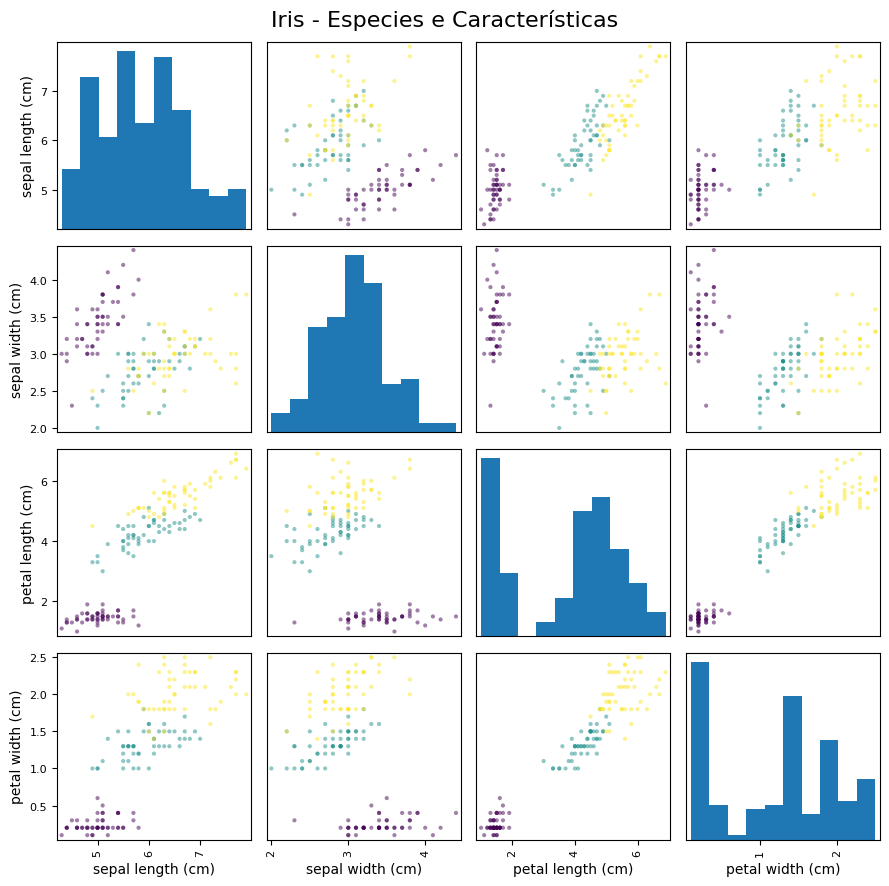

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


df = pd.DataFrame(X, columns=feature_names)

#Visualização por features e classes
scatter_matrix(
    df,
    figsize=(9, 9),
    c=y
)

plt.suptitle("Iris - Especies e Características", fontsize=16)
plt.tight_layout()
plt.show()


## 4) Divisão em treino, validação e teste (70/15/15)

In [7]:
# 1º passo: separa treino (70%) e temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

# 2º passo: do temporário, metade vira validação (15%) e metade teste (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_temp
)

print('Tamanho treino:', X_train.shape[0])
print('Tamanho validação:', X_val.shape[0])
print('Tamanho teste:', X_test.shape[0])

Tamanho treino: 105
Tamanho validação: 22
Tamanho teste: 23


## 5) Treinar um modelo simples (Regressão Logística)

In [8]:
# Criamos o modelo com hiperparâmetros padrão (bom para começar)
model = LogisticRegression()

# Treinamos apenas com o conjunto de treino
model.fit(X_train, y_train)

model

c:\Users\PICHAU\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 6) Avaliar no conjunto de VALIDAÇÃO (ajustes)

Acurácia (validação): 0.864
Precisão (validação): 0.861
Recall   (validação): 0.857
F1       (validação): 0.856


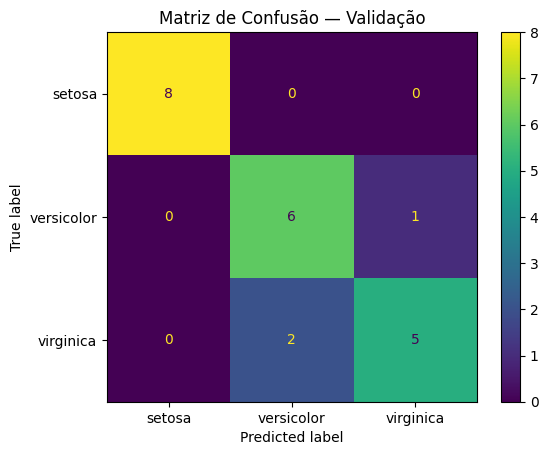

Interpretação rápida: a diagonal mostra acertos por classe; fora da diagonal são confusões.


In [9]:
# Fazemos previsões no conjunto de validação
y_val_pred = model.predict(X_val)

# Calculamos métricas (média macro: trata as classes de forma equilibrada)
acc_val  = accuracy_score(y_val, y_val_pred)
prec_val = precision_score(y_val, y_val_pred, average='macro')
rec_val  = recall_score(y_val, y_val_pred, average='macro')
f1_val   = f1_score(y_val, y_val_pred, average='macro')

print(f'Acurácia (validação): {acc_val:.3f}')
print(f'Precisão (validação): {prec_val:.3f}')
print(f'Recall   (validação): {rec_val:.3f}')
print(f'F1       (validação): {f1_val:.3f}')

# Matriz de confusão (validação)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=class_names)
disp.plot()
plt.title('Matriz de Confusão — Validação')
plt.show()

print('Interpretação rápida: a diagonal mostra acertos por classe; fora da diagonal são confusões.')

## 7) Avaliação FINAL no conjunto de TESTE (generalização)

--- RESULTADOS FINAIS (TESTE) ---
Acurácia: 1.000
Precisão: 1.000
Recall  : 1.000
F1      : 1.000


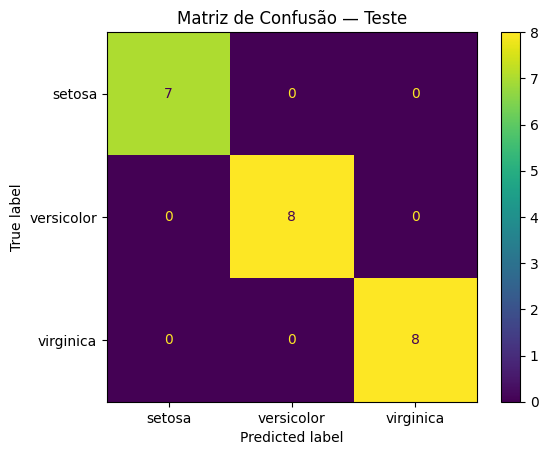

Conclusão: estes números representam o desempenho “real” do modelo em novos dados.


In [10]:
# Previsões no conjunto de teste — dados nunca vistos
y_test_pred = model.predict(X_test)

acc_test  = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred, average='macro')
rec_test  = recall_score(y_test, y_test_pred, average='macro')
f1_test   = f1_score(y_test, y_test_pred, average='macro')

print('--- RESULTADOS FINAIS (TESTE) ---')
print(f'Acurácia: {acc_test:.3f}')
print(f'Precisão: {prec_test:.3f}')
print(f'Recall  : {rec_test:.3f}')
print(f'F1      : {f1_test:.3f}')

cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=class_names)
disp.plot()
plt.title('Matriz de Confusão — Teste')
plt.show()

print('Conclusão: estes números representam o desempenho “real” do modelo em novos dados.')

## 8) O que aprendemos / próximos passos
- A importância de **separar dados** em *treino*, *validação* e *teste*.
- Como **treinar** e **avaliar** um modelo simples.
- Como **ler a matriz de confusão** para entender onde o modelo erra.

**Próximos passos sugeridos:**
- Testar outros modelos (Árvore de Decisão, KNN, SVM).
- Padronizar as features (`StandardScaler`) e comparar.
- Usar *cross-validation* para avaliação mais robusta.
